# Lexical Resources

In [1]:
import nltk
nltk.download("book")
from nltk.book import *
from nltk.corpus import stopwords

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /home/sjvasconcello/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]    |     /home/sjvasconcello/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package chat80 to
[nltk_data]    |     /home/sjvasconcello/nltk_data...
[nltk_data]    |   Package chat80 is already up-to-date!
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /home/sjvasconcello/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package conll2000 to
[nltk_data]    |     /home/sjvasconcello/nltk_data...
[nltk_data]    |   Package conll2000 is already up-to-date!
[nltk_data]    | Downloading package conll2002 to
[nltk_data]    |     /home/sjvasconcello/nltk_data...
[nltk_data]    |   Package conll2002 is alread

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


## Recursos lexicos

In [19]:
# Vocabulario
vocab = sorted(set(text1))

In [20]:
# Distribuciones
word_freq = FreqDist(text1)

In [21]:
# Stopwords
stopwords.words("spanish")[:10]

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se']

### Fraccion de Stopwords en un corpus

In [22]:
def stopwords_percentage(text):
    stopwd = stopwords.words("english")
    content = [w for w in text if w.lower() not in stopwd]
    return  len(content) / len(text)

In [23]:
# Cantidad de palabras que no son stopwords
stopwords_percentage(text1)

0.5862954769399469

In [24]:
# Cantidad de palabras que si son Stopwords
1 -stopwords_percentage(text1)

0.4137045230600531

## Lexicons enriquecidos (listas comparativas de palabra)

In [25]:
from nltk.corpus import swadesh
print(swadesh.fileids())

['be', 'bg', 'bs', 'ca', 'cs', 'cu', 'de', 'en', 'es', 'fr', 'hr', 'it', 'la', 'mk', 'nl', 'pl', 'pt', 'ro', 'ru', 'sk', 'sl', 'sr', 'sw', 'uk']


In [26]:
print(swadesh.words("en")[:10])

['I', 'you (singular), thou', 'he', 'we', 'you (plural)', 'they', 'this', 'that', 'here', 'there']


In [27]:
fr2es = swadesh.entries(["fr","es"])
print(fr2es[:10])

[('je', 'yo'), ('tu, vous', 'tú, usted'), ('il', 'él'), ('nous', 'nosotros'), ('vous', 'vosotros, ustedes'), ('ils, elles', 'ellos, ellas'), ('ceci', 'este'), ('cela', 'ese, aquel'), ('ici', 'aquí, acá'), ('là', 'ahí, allí, allá')]


In [28]:
translate = dict(fr2es)
translate["chien"]

'perro'

In [29]:
translate["jeter"]

'tirar'

## WordNet

In [30]:
nltk.download("omw")
nltk.download("wordnet")
from nltk.corpus import wordnet as wn

[nltk_data] Downloading package omw to
[nltk_data]     /home/sjvasconcello/nltk_data...
[nltk_data]   Package omw is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/sjvasconcello/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [31]:
# Synsets: grupo sinonimos
ss = wn.synsets("carro", lang = "spa")
ss

[Synset('car.n.01'),
 Synset('carriage.n.04'),
 Synset('carrier.n.02'),
 Synset('cart.n.01'),
 Synset('chariot.n.02'),
 Synset('cartload.n.01')]

In [32]:
# explorar synsets
for syn in ss:
    print(syn.name(), " : ", syn.definition())
    for name in syn.lemma_names():
        print(" * ", name)

car.n.01  :  a motor vehicle with four wheels; usually propelled by an internal combustion engine
 *  car
 *  auto
 *  automobile
 *  machine
 *  motorcar
carriage.n.04  :  a machine part that carries something else
 *  carriage
carrier.n.02  :  a self-propelled wheeled vehicle designed specifically to carry something
 *  carrier
cart.n.01  :  a heavy open wagon usually having two wheels and drawn by an animal
 *  cart
chariot.n.02  :  a two-wheeled horse-drawn battle vehicle; used in war and races in ancient Egypt and Greece and Rome
 *  chariot
cartload.n.01  :  the quantity that a cart holds
 *  cartload


In [33]:
import networkx as nx
import matplotlib.pyplot as plt

def clousure_graph(synset, fn):
  seen = set()
  graph = nx.DiGraph()
  labels = {}

  def recurse(s):
    if not s in seen:
      seen.add(s)
      labels[s.name] = s.name().split('.')[0]
      graph.add_node(s.name)
      for s1 in fn(s):
        graph.add_node(s1.name)
        graph.add_edge(s.name, s1.name)
        recurse(s1)
  recurse(synset)
  return graph, labels

def draw_text_graph(G, labels):
  plt.figure(figsize=(18, 12))
  pos = nx.planar_layout(G, scale=18)
  nx.draw_networkx_nodes(G, pos, node_color="red", linewidths=0, node_size=500)
  nx.draw_networkx_labels(G, pos, font_size=20, labels=labels)
  nx.draw_networkx_edges(G, pos)
  plt.xticks([])
  plt.yticks([])


### Hyponyms:
Conceptos que son más especificos que la palabra raiz de la cual derivan.

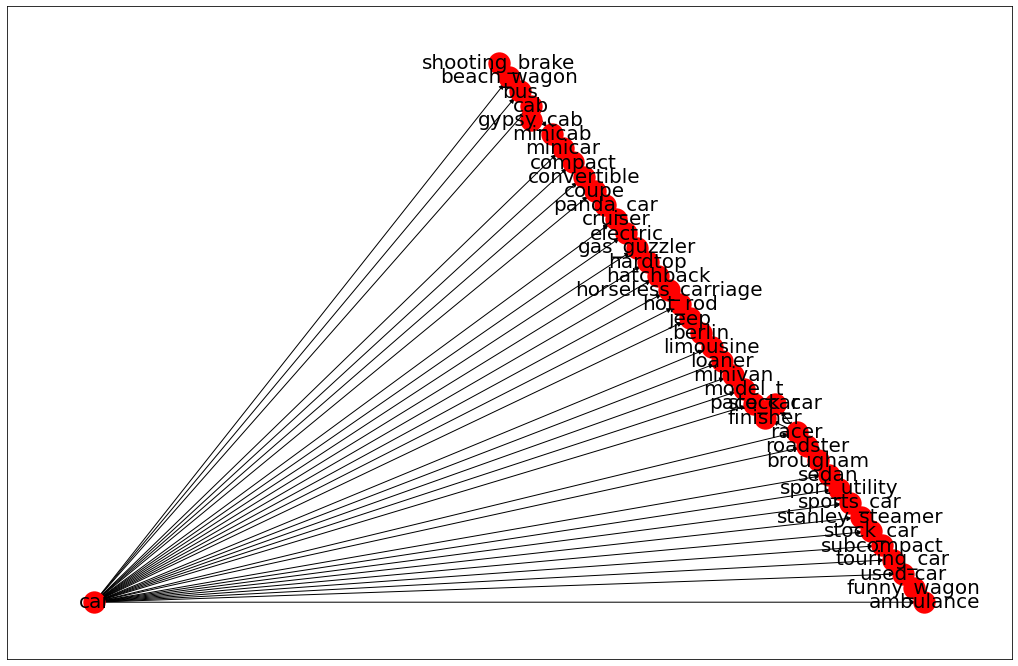

In [34]:
G, labels = clousure_graph(ss[0], fn = lambda s: s.hyponyms())
draw_text_graph(G, labels)

### Hypernyms
Concptios que son mas generales

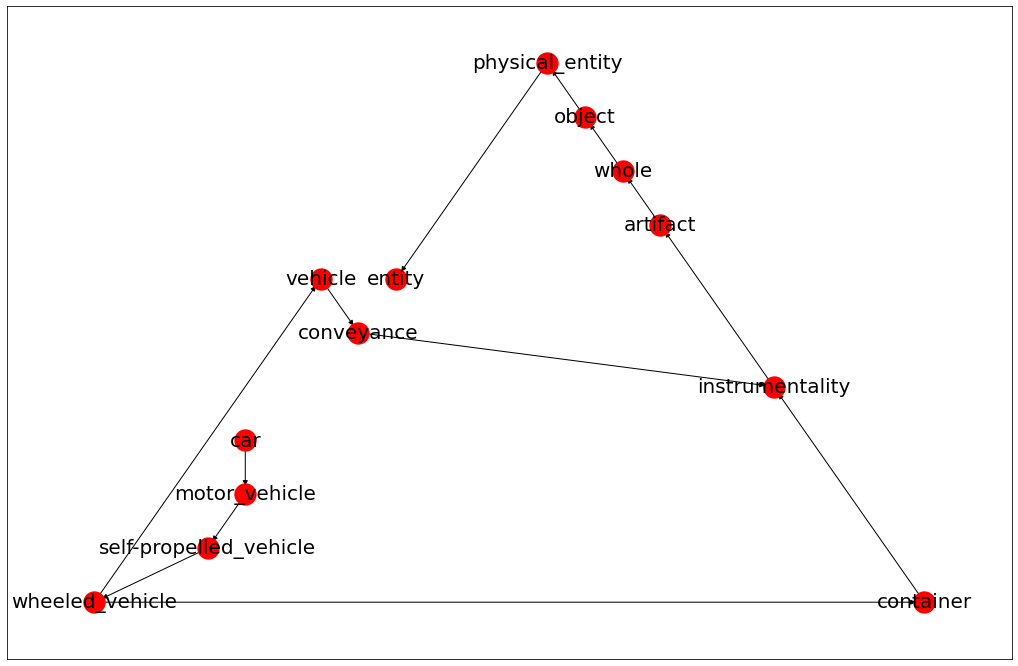

In [35]:
G, labels = clousure_graph(ss[0], fn = lambda s: s.hypernyms())
draw_text_graph(G, labels)

## Similitud Semantica

In [40]:
def show_syns(word):
    ss = wn.synsets(word, lang = "spa")
    for syn in ss:
        print(syn.name(), " : ", syn.definition())
        for name in syn.lemma_names():
            print(" * ", name)
    return ss

In [45]:
ss1 = show_syns("perro")

dog.n.01  :  a member of the genus Canis (probably descended from the common wolf) that has been domesticated by man since prehistoric times; occurs in many breeds
 *  dog
 *  domestic_dog
 *  Canis_familiaris
rotter.n.01  :  a person who is deemed to be despicable or contemptible
 *  rotter
 *  dirty_dog
 *  rat
 *  skunk
 *  stinker
 *  stinkpot
 *  bum
 *  puke
 *  crumb
 *  lowlife
 *  scum_bag
 *  so-and-so
 *  git


In [46]:
ss2 = show_syns("gato")

cat.n.01  :  feline mammal usually having thick soft fur and no ability to roar: domestic cats; wildcats
 *  cat
 *  true_cat
tom.n.02  :  male cat
 *  tom
 *  tomcat
dodger.n.01  :  a shifty deceptive person
 *  dodger
 *  fox
 *  slyboots


In [47]:
ss3 = show_syns("animal")

animal.n.01  :  a living organism characterized by voluntary movement
 *  animal
 *  animate_being
 *  beast
 *  brute
 *  creature
 *  fauna
beast.n.02  :  a cruelly rapacious person
 *  beast
 *  wolf
 *  savage
 *  brute
 *  wildcat
dunce.n.01  :  a stupid person; these words are used to express a low opinion of someone's intelligence
 *  dunce
 *  dunderhead
 *  numskull
 *  blockhead
 *  bonehead
 *  lunkhead
 *  hammerhead
 *  knucklehead
 *  loggerhead
 *  muttonhead
 *  shithead
 *  dumbass
 *  fuckhead


In [48]:
perro = ss1[0]
gato = ss2[0]
animal =ss3[0]

In [52]:
# Similitud semantica
animal.path_similarity(perro)

0.3333333333333333

In [53]:
animal.path_similarity(gato)

0.125

In [54]:
gato.path_similarity(perro)

0.2